# Pymaceuticals Inc.
---

 

In [197]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
single_data = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")

# Display the data table for preview
single_data.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [198]:
# Checking the number of mice.
mice_count = len(single_data["Mouse ID"].unique())
mice_count

249

In [199]:
# Our data should be uniquely identified by Mouse ID and Timepoint
mice = single_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
D_mice_ID = single_data.loc[mice, 'Mouse ID'].unique()


In [200]:
# Optional: Get all the data for the duplicate mouse ID. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
D_mice_ID_df = single_data.loc[single_data['Mouse ID'] == D_mice_ID[0]]
D_mice_ID_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [201]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_data_df = single_data.drop(D_mice_ID_df.index)


In [202]:
# Checking the number of mice in the clean DataFrame.
mice_analysis = len(Clean_data_df['Mouse ID'].unique())
print(mice_analysis)

248


## Summary Statistics

In [203]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen = single_data.groupby ("Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean = drug_regimen['Tumor Volume (mm3)'].mean()
Median = drug_regimen['Tumor Volume (mm3)'].median()
variance = drug_regimen['Tumor Volume (mm3)'].var()
stdevs = drug_regimen['Tumor Volume (mm3)'].std()
sem = drug_regimen['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
Summary_df= pd.DataFrame({
    'Mean': mean,
    'Median': Median,
    'Variance': variance,
    'Standard deviation': stdevs,
    'SEM': sem})

Summary_df

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Total Number of Rows')

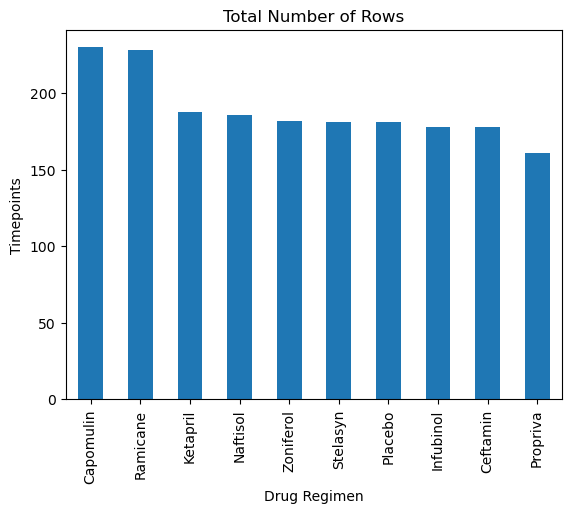

In [204]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_count = single_data ['Drug Regimen'].value_counts()

regimen_chart = regimen_count.plot(kind='bar')
regimen_chart.set_ylabel("Timepoints")

regimen_chart.set_title(label= "Total Number of Rows")

Text(0, 0.5, 'Timepoints')

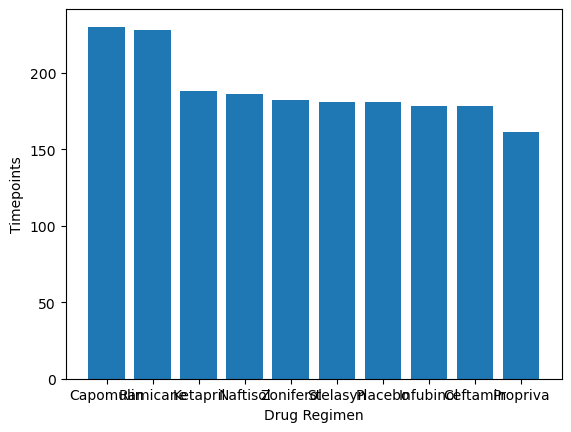

In [205]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(regimen_count.index.values, regimen_count)
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")



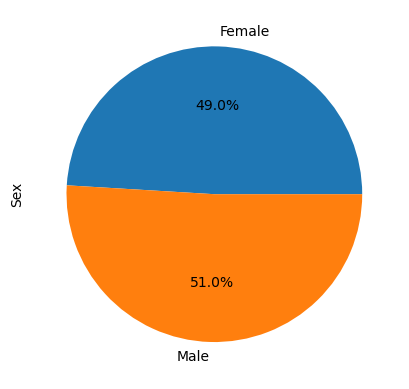

In [206]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_sex = Clean_data_df.groupby('Sex')['Sex'].count()
mice_sex

mice_sex_chart = mice_sex.plot(kind='pie', autopct='%1.1f%%')


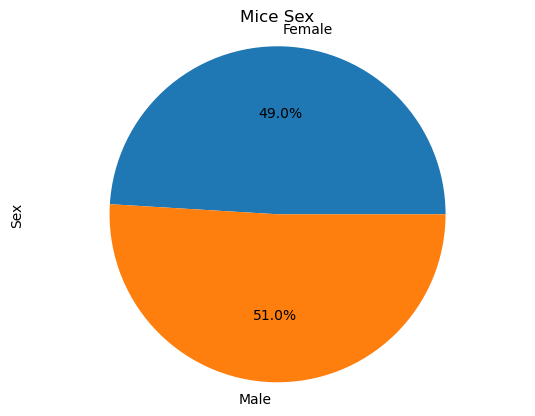

In [207]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Bar_Mice = plt.pie (mice_sex, labels=mice_sex.index, autopct="%1.1f%%")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Set x/y label, title
plt.title('Mice Sex')
plt.ylabel('Sex')

plt.show()

plt.close()

## Quartiles, Outliers and Boxplots

In [208]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_vol = Clean_data_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_vol.reset_index()


In [209]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in Treatments:

     # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # add subset
    final_tumor_vol_list.append(final_tumor_vol)

    # Calculate the IQR and quantitatively
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) 
                  | (final_tumor_vol > upper_bound)]

     # Print out the result
print(f"{drug} Regimen")
print(f"Capmulin: {outliers.count()}")
print(f" Ramicane: {outliers.count()}")
print(f"Infubinol: {outliers.count()}")
print(f"Ceftamin: {outliers.count()}")



Ceftamin Regimen
Capmulin: 0
 Ramicane: 0
Infubinol: 0
Ceftamin: 0


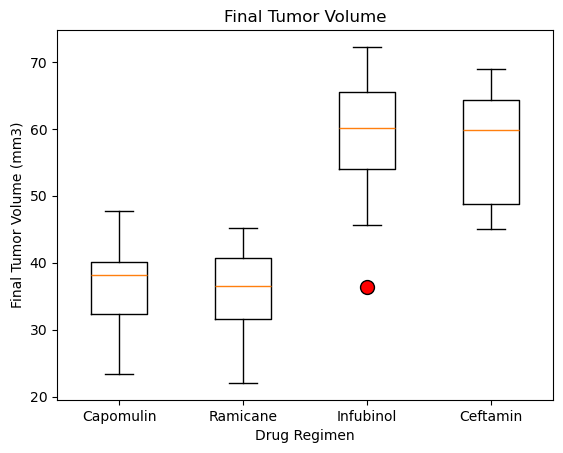

In [210]:

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, labels=Treatments, flierprops={'markerfacecolor':'r','markersize': 10})

final_tumor_plot.set_title('Final Tumor Volume')
final_tumor_plot.set_xlabel('Drug Regimen')
final_tumor_plot.set_ylabel('Final Tumor Volume (mm3)')

plt.show()


## Line and Scatter Plots

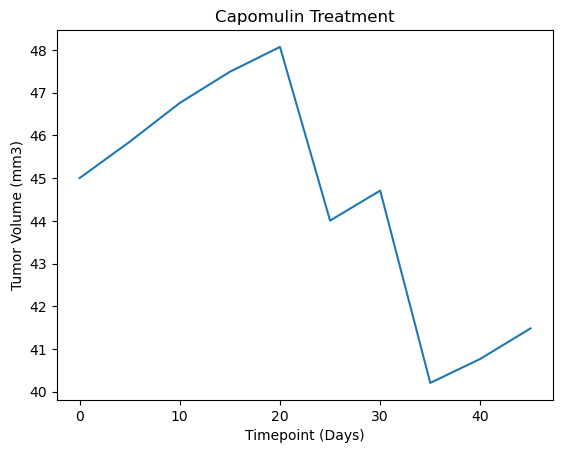

In [224]:
# Generate dataframe only in Capomulin Regimen
Capomulin_regimen = Clean_data_df.loc[Clean_data_df['Drug Regimen'] == 'Capomulin']

mouse_id = 'l509'
mouse_df = Capomulin_regimen.loc[Capomulin_regimen['Mouse ID'] == mouse_id]

time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'])

plt.title(f"Capomulin Treatment")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


